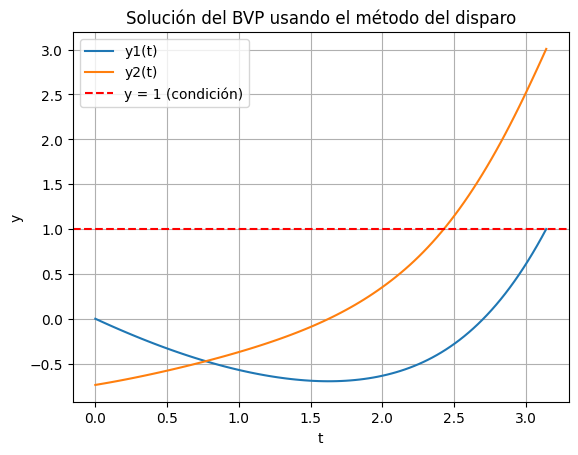

np.float64(-0.7377789159374023)

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def ode_system(t, y):
    y1, y2 = y
    return [y2, y2 + np.cos(y1)]

# Resolver el IVP para un valor dado de s
def solve_ivp_for_s(s, t_span, t_eval):
    # Condición inicial [y1(0), y2(0)]
    y0 = [0, s]
    solution = solve_ivp(ode_system, t_span, y0, t_eval=t_eval, method='RK45')
    return solution

# Definir F(s) = y1(pi) - 1
def F(s):
    t_span = [0, np.pi]
    t_eval = [np.pi]  # Solo necesitamos el valor en t = pi
    solution = solve_ivp_for_s(s, t_span, t_eval)
    y1_at_pi = solution.y[0][-1]
    return y1_at_pi - 1

# Método de Newton para encontrar la raíz de F(s)
def newton_method(F, s0, tol=1e-6, max_iter=100):
    s = s0
    for i in range(max_iter):
        F_val = F(s)
        if abs(F_val) < tol:
            return s  # Raíz encontrada
        # Aproximar la derivada de F(s) usando diferencias finitas
        delta = 1e-5
        F_prime_approx = (F(s + delta) - F(s)) / delta
        # Actualizar s usando el método de Newton
        s = s - F_val / F_prime_approx
    raise ValueError("El método de Newton no convergió")

# Parámetros iniciales
s0 = 0.5  # Adivinanza inicial para s

# Encontrar el valor de s que satisface F(s) = 0
s_root = newton_method(F, s0)

# Resolver el sistema con el valor encontrado de s
t_span = [0, np.pi]
t_eval = np.linspace(0, np.pi, 100)
solution = solve_ivp_for_s(s_root, t_span, t_eval)

# Graficar la solución
plt.plot(solution.t, solution.y[0], label='y1(t)')
plt.plot(solution.t, solution.y[1], label='y2(t)')
plt.axhline(1, color='red', linestyle='--', label='y = 1 (condición)')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solución del BVP usando el método del disparo')
plt.legend()
plt.grid()
plt.show()

s_root


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

# Definir el sistema de EDOs
def coupled_odes(x, y):
    u, u_prime, v, v_prime = y
    return [u_prime, np.sin(v), v_prime, -np.cos(u)]

def solve_ivp_for_p(p, x_span, x_eval):
    y0 = [1, p[0], 0, p[1]]
    solution = solve_ivp(coupled_odes, x_span, y0, t_eval=x_eval, method='RK45')
    return solution

def F(p):
    x_span = [-1, 1]
    x_eval = [1]  
    solution = solve_ivp_for_p(p, x_span, x_eval)
    y2_at_1 = solution.y[1][-1]
    y4_at_1 = solution.y[3][-1]
    return np.array([y2_at_1, y4_at_1])

def newton_method_vector(F, p0, tol=1e-6, max_iter=100):
    p = np.array(p0, dtype=float)
    for i in range(max_iter):
        F_val = F(p)
        if np.linalg.norm(F_val, ord=2) < tol:
            return p 
        delta = 1e-5
        J = np.zeros((len(p), len(p)))
        for j in range(len(p)):
            p_delta = p.copy()
            p_delta[j] += delta
            J[:, j] = (F(p_delta) - F_val) / delta
        # Actualizar p usando el método de Newton
        p -= np.linalg.solve(J, F_val)
    raise ValueError("El método de Newton no convergió")

# Parámetros iniciales
p0 = [0.0, 0.0]  # Adivinanza inicial para [p1, p2]

# Resolver el sistema para encontrar p = [p1, p2]
p_solution = newton_method_vector(F, p0)

# Resolver el sistema completo con los valores encontrados de p
x_span = [-1, 1]
x_eval = np.linspace(-1, 1, 100)
solution = solve_ivp_for_p(p_solution, x_span, x_eval)

# Extraer las soluciones u(x) y v(x)
x = solution.t
u = solution.y[0]
v = solution.y[2]

# Mostrar los resultados